# Neural Network with Two Layers

In [1]:
#Importing Packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
# A function to create a dataset.
from sklearn.datasets import make_blobs

%matplotlib inline 

np.random.seed(3)

The shape of X is: (2, 2000)
The shape of Y is: (1, 2000)
I have m = 2000 training examples!


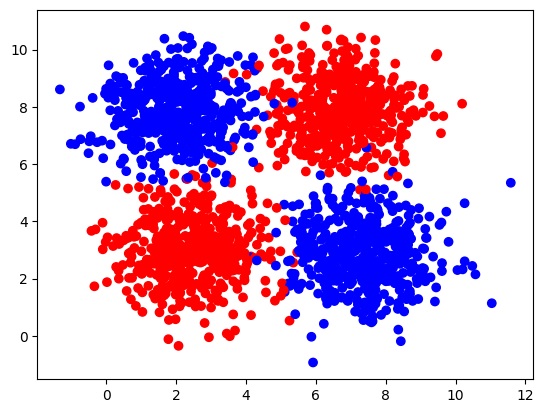

In [2]:
#Creating 2000 data points
#The labels = 0:blue , 1:red

m = 2000
samples, labels = make_blobs(n_samples=m, 
                             centers=([2.5, 3], [6.7, 7.9], [2.1, 7.9], [7.4, 2.8]), 
                             cluster_std=1.1,
                             random_state=0)
labels[(labels == 0) | (labels == 1)] = 1
labels[(labels == 2) | (labels == 3)] = 0
X = np.transpose(samples)
Y = labels.reshape((1, m))

plt.scatter(X[0, :], X[1, :], c=Y, cmap=colors.ListedColormap(['blue', 'red']));

print ('The shape of X is: ' + str(X.shape))
print ('The shape of Y is: ' + str(Y.shape))
print ('I have m = %d training examples!' % (m))

In [3]:
#Activation Function: Sigmoid
def sigmoid(z):
    res = 1/(1+np.exp(-z))
    return res

In [4]:
print("sigmoid(-2) = " + str(sigmoid(-2)))
print("sigmoid(0) = " + str(sigmoid(0)))
print("sigmoid3.5) = " + str(sigmoid(3.5)))

sigmoid(-2) = 0.11920292202211755
sigmoid(0) = 0.5
sigmoid3.5) = 0.9706877692486436


In [5]:
def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    n_x = X.shape[0]
    n_h = 2
    n_y = Y.shape[0]
    
    return (n_x, n_h, n_y)

In [6]:
(n_x, n_h, n_y) = layer_sizes(X, Y)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 2
The size of the hidden layer is: n_h = 2
The size of the output layer is: n_y = 1


In [7]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    #Randomly initialize a matrix of shape (n_h , n_x)
    W1 = np.random.randn(n_h , n_x) * 0.01
    b1 = np.zeros((n_h , 1))
    W2 = np.random.randn(n_y , n_h) * 0.01
    b2 = np.zeros((n_y , 1))
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [8]:
parameters = initialize_parameters(n_x, n_h, n_y)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.01788628  0.0043651 ]
 [ 0.00096497 -0.01863493]]
b1 = [[0.]
 [0.]]
W2 = [[-0.00277388 -0.00354759]]
b2 = [[0.]]


In [9]:
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- the sigmoid output of the second activation
    cache -- python dictionary containing Z1, A1, Z2, A2 
    (that simplifies the calculations in the back propagation step)
    """
    # Retrieve each parameter from the dictionary "parameters".
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    # Implement forward propagation to calculate A2.
    Z1 = np.matmul(W1 , X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2 , A1) + b2
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (n_y, X.shape[1]))

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [10]:
#Weights were just initialized with some random values, so the model has not been trained yet.
A2, cache = forward_propagation(X, parameters)

print(A2)

[[0.49920157 0.49922234 0.49921223 ... 0.49921215 0.49921043 0.49920665]]


In [11]:
def compute_cost(A2, Y):
    """
    Computes the cost function as a log loss
    
    Arguments:
    A2 -- The output of the neural network of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    cost -- log loss
    
    """
    # Number of examples.
    m = Y.shape[1]
    
    logloss = - np.multiply(np.log(A2), Y) - np.multiply(np.log(1 - A2), 1 - Y)
    cost = 1/m * np.sum(logloss)
    
    assert(isinstance(cost, float))
    
    return cost

In [12]:
print("cost = " + str(compute_cost(A2, Y)))

cost = 0.6931477703826823


In [13]:
def backward_propagation(parameters, cache, X, Y):
    """
    Implements the backward propagation, calculating gradients
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- python dictionary containing Z1, A1, Z2, A2
    X -- input data of shape (n_x, number of examples)
    Y -- "true" labels vector of shape (n_y, number of examples)
    
    Returns:
    grads -- python dictionary containing gradients with respect to different parameters
    """
    m = X.shape[1]
    
    #Retrieve W from the dictionary "parameters".
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    #Retrieve also A1 and A2 from dictionary "cache".
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    #Backward propagation 
    dZ2 = A2 - Y
    dW2 = 1/m * np.dot(dZ2, A1.T)
    db2 = 1/m * np.sum(dZ2, axis = 1, keepdims = True)
    dZ1 = np.dot(W2.T, dZ2) * A1 * (1 - A1)
    dW1 = 1/m * np.dot(dZ1, X.T)
    db1 = 1/m * np.sum(dZ1, axis = 1, keepdims = True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

grads = backward_propagation(parameters, cache, X, Y)

print("dW1 = " + str(grads["dW1"]))
print("db1 = " + str(grads["db1"]))
print("dW2 = " + str(grads["dW2"]))
print("db2 = " + str(grads["db2"]))

dW1 = [[-1.49856632e-05  1.67791519e-05]
 [-2.12394543e-05  2.43895135e-05]]
db1 = [[5.11207671e-07]
 [7.06236219e-07]]
dW2 = [[-0.00032641 -0.0002606 ]]
db2 = [[-0.00078732]]


In [14]:
def update_parameters(parameters, grads, learning_rate=1.2):
    """
    Updates parameters using the gradient descent update rule
    
    Arguments:
    parameters -- python dictionary containing parameters 
    grads -- python dictionary containing gradients
    learning_rate -- learning rate for gradient descent
    
    Returns:
    parameters -- python dictionary containing updated parameters 
    """
   
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    # Update
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [15]:
parameters_updated = update_parameters(parameters, grads)

print("W1 updated = " + str(parameters_updated["W1"]))
print("b1 updated = " + str(parameters_updated["b1"]))
print("W2 updated = " + str(parameters_updated["W2"]))
print("b2 updated = " + str(parameters_updated["b2"]))

W1 updated = [[ 0.01790427  0.00434496]
 [ 0.00099046 -0.01866419]]
b1 updated = [[-6.13449205e-07]
 [-8.47483463e-07]]
W2 updated = [[-0.00238219 -0.00323487]]
b2 updated = [[0.00094478]]


In [16]:
# Neural Network Model
def nn_model(X, Y, n_h, num_iterations=10, learning_rate=1.2, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (n_x, number of examples)
    Y -- labels of shape (n_y, number of examples)
    num_iterations -- number of iterations in the loop
    learning_rate -- learning rate parameter for gradient descent
    print_cost -- if True, print the cost every iteration
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Initialize parameters.
    parameters = initialize_parameters(n_x , n_h , n_y)
    
    # Loop.
    for i in range(0, num_iterations):
         
        # Forward propagation
        A2 , cache = forward_propagation(X , parameters)
        
        # Cost function
        cost = compute_cost(A2 , Y)
        
        # Backpropagation
        grads = backward_propagation(parameters , cache , X , Y)
        
        # Gradient descent parameter update
        parameters = update_parameters(parameters , grads , learning_rate)
        
        # Print the cost every iteration.
        if print_cost:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [17]:
parameters = nn_model(X, Y, n_h=2, num_iterations=3000, learning_rate=1.2, print_cost=True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = parameters["W1"]
b1 = parameters["b1"]
W2 = parameters["W2"]
b2 = parameters["b2"]

Cost after iteration 0: 0.693148
Cost after iteration 1: 0.693147
Cost after iteration 2: 0.693147
Cost after iteration 3: 0.693147
Cost after iteration 4: 0.693147
Cost after iteration 5: 0.693147
Cost after iteration 6: 0.693147
Cost after iteration 7: 0.693147
Cost after iteration 8: 0.693147
Cost after iteration 9: 0.693147
Cost after iteration 10: 0.693147
Cost after iteration 11: 0.693147
Cost after iteration 12: 0.693147
Cost after iteration 13: 0.693147
Cost after iteration 14: 0.693147
Cost after iteration 15: 0.693147
Cost after iteration 16: 0.693147
Cost after iteration 17: 0.693147
Cost after iteration 18: 0.693147
Cost after iteration 19: 0.693147
Cost after iteration 20: 0.693147
Cost after iteration 21: 0.693147
Cost after iteration 22: 0.693146
Cost after iteration 23: 0.693146
Cost after iteration 24: 0.693146
Cost after iteration 25: 0.693146
Cost after iteration 26: 0.693146
Cost after iteration 27: 0.693146
Cost after iteration 28: 0.693146
Cost after iteration 29:

<a name='ex08'></a>
### Exercise 8

Computes probabilities using forward propagation, and make classification to 0/1 using 0.5 as the threshold.

In [18]:
# GRADED FUNCTION: predict

def predict(X, parameters):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (blue: 0 / red: 1)
    """
    A2 , cache = forward_propagation(X , parameters)
    predictions = A2 > 0.5
    
    return predictions

In [19]:
X_pred = np.array([[2, 8, 2, 8], [2, 8, 8, 2]])
Y_pred = predict(X_pred, parameters)

print(f"Coordinates (in the columns):\n{X_pred}")
print(f"Predictions:\n{Y_pred}")

Coordinates (in the columns):
[[2 8 2 8]
 [2 8 8 2]]
Predictions:
[[ True  True False False]]


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 2')

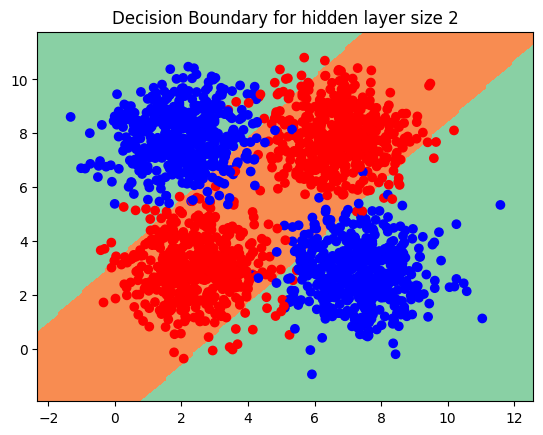

In [20]:
def plot_decision_boundary(predict, parameters, X, Y):
    # Define bounds of the domain.
    min1, max1 = X[0, :].min()-1, X[0, :].max()+1
    min2, max2 = X[1, :].min()-1, X[1, :].max()+1
    # Define the x and y scale.
    x1grid = np.arange(min1, max1, 0.1)
    x2grid = np.arange(min2, max2, 0.1)
    # Create all of the lines and rows of the grid.
    xx, yy = np.meshgrid(x1grid, x2grid)
    # Flatten each grid to a vector.
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((1, len(r1))), r2.reshape((1, len(r2)))
    # Vertical stack vectors to create x1,x2 input for the model.
    grid = np.vstack((r1,r2))
    # Make predictions for the grid.
    predictions = predict(grid, parameters)
    # Reshape the predictions back into a grid.
    zz = predictions.reshape(xx.shape)
    # Plot the grid of x, y and z values as a surface.
    plt.contourf(xx, yy, zz, cmap=plt.cm.Spectral.reversed())
    plt.scatter(X[0, :], X[1, :], c=Y, cmap=colors.ListedColormap(['blue', 'red']));

# Plot the decision boundary.
plot_decision_boundary(predict, parameters, X, Y)
plt.title("Decision Boundary for hidden layer size " + str(n_h))

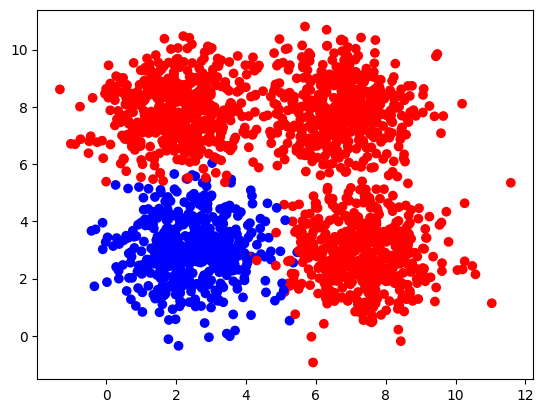

In [21]:
#Let's build a different dataset:
n_samples = 2000
samples, labels = make_blobs(n_samples=n_samples, 
                             centers=([2.5, 3], [6.7, 7.9], [2.1, 7.9], [7.4, 2.8]), 
                             cluster_std=1.1,
                             random_state=0)
labels[(labels == 0)] = 0
labels[(labels == 1)] = 1
labels[(labels == 2) | (labels == 3)] = 1
X_2 = np.transpose(samples)
Y_2 = labels.reshape((1,n_samples))

plt.scatter(X_2[0, :], X_2[1, :], c=Y_2, cmap=colors.ListedColormap(['blue', 'red']));

Text(0.5, 1.0, 'Decision Boundary')

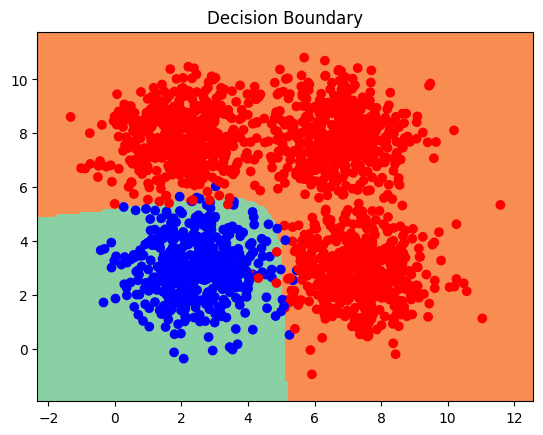

In [22]:

parameters_2 = nn_model(X_2, Y_2, n_h=2, num_iterations=3000, learning_rate=1.2, print_cost=False)
plot_decision_boundary(predict, parameters_2, X_2, Y_2)
plt.title("Decision Boundary")